# TESLA STOCK PRICE ANALYSIS AND PREDICTION USING LSTM (2010-2020)

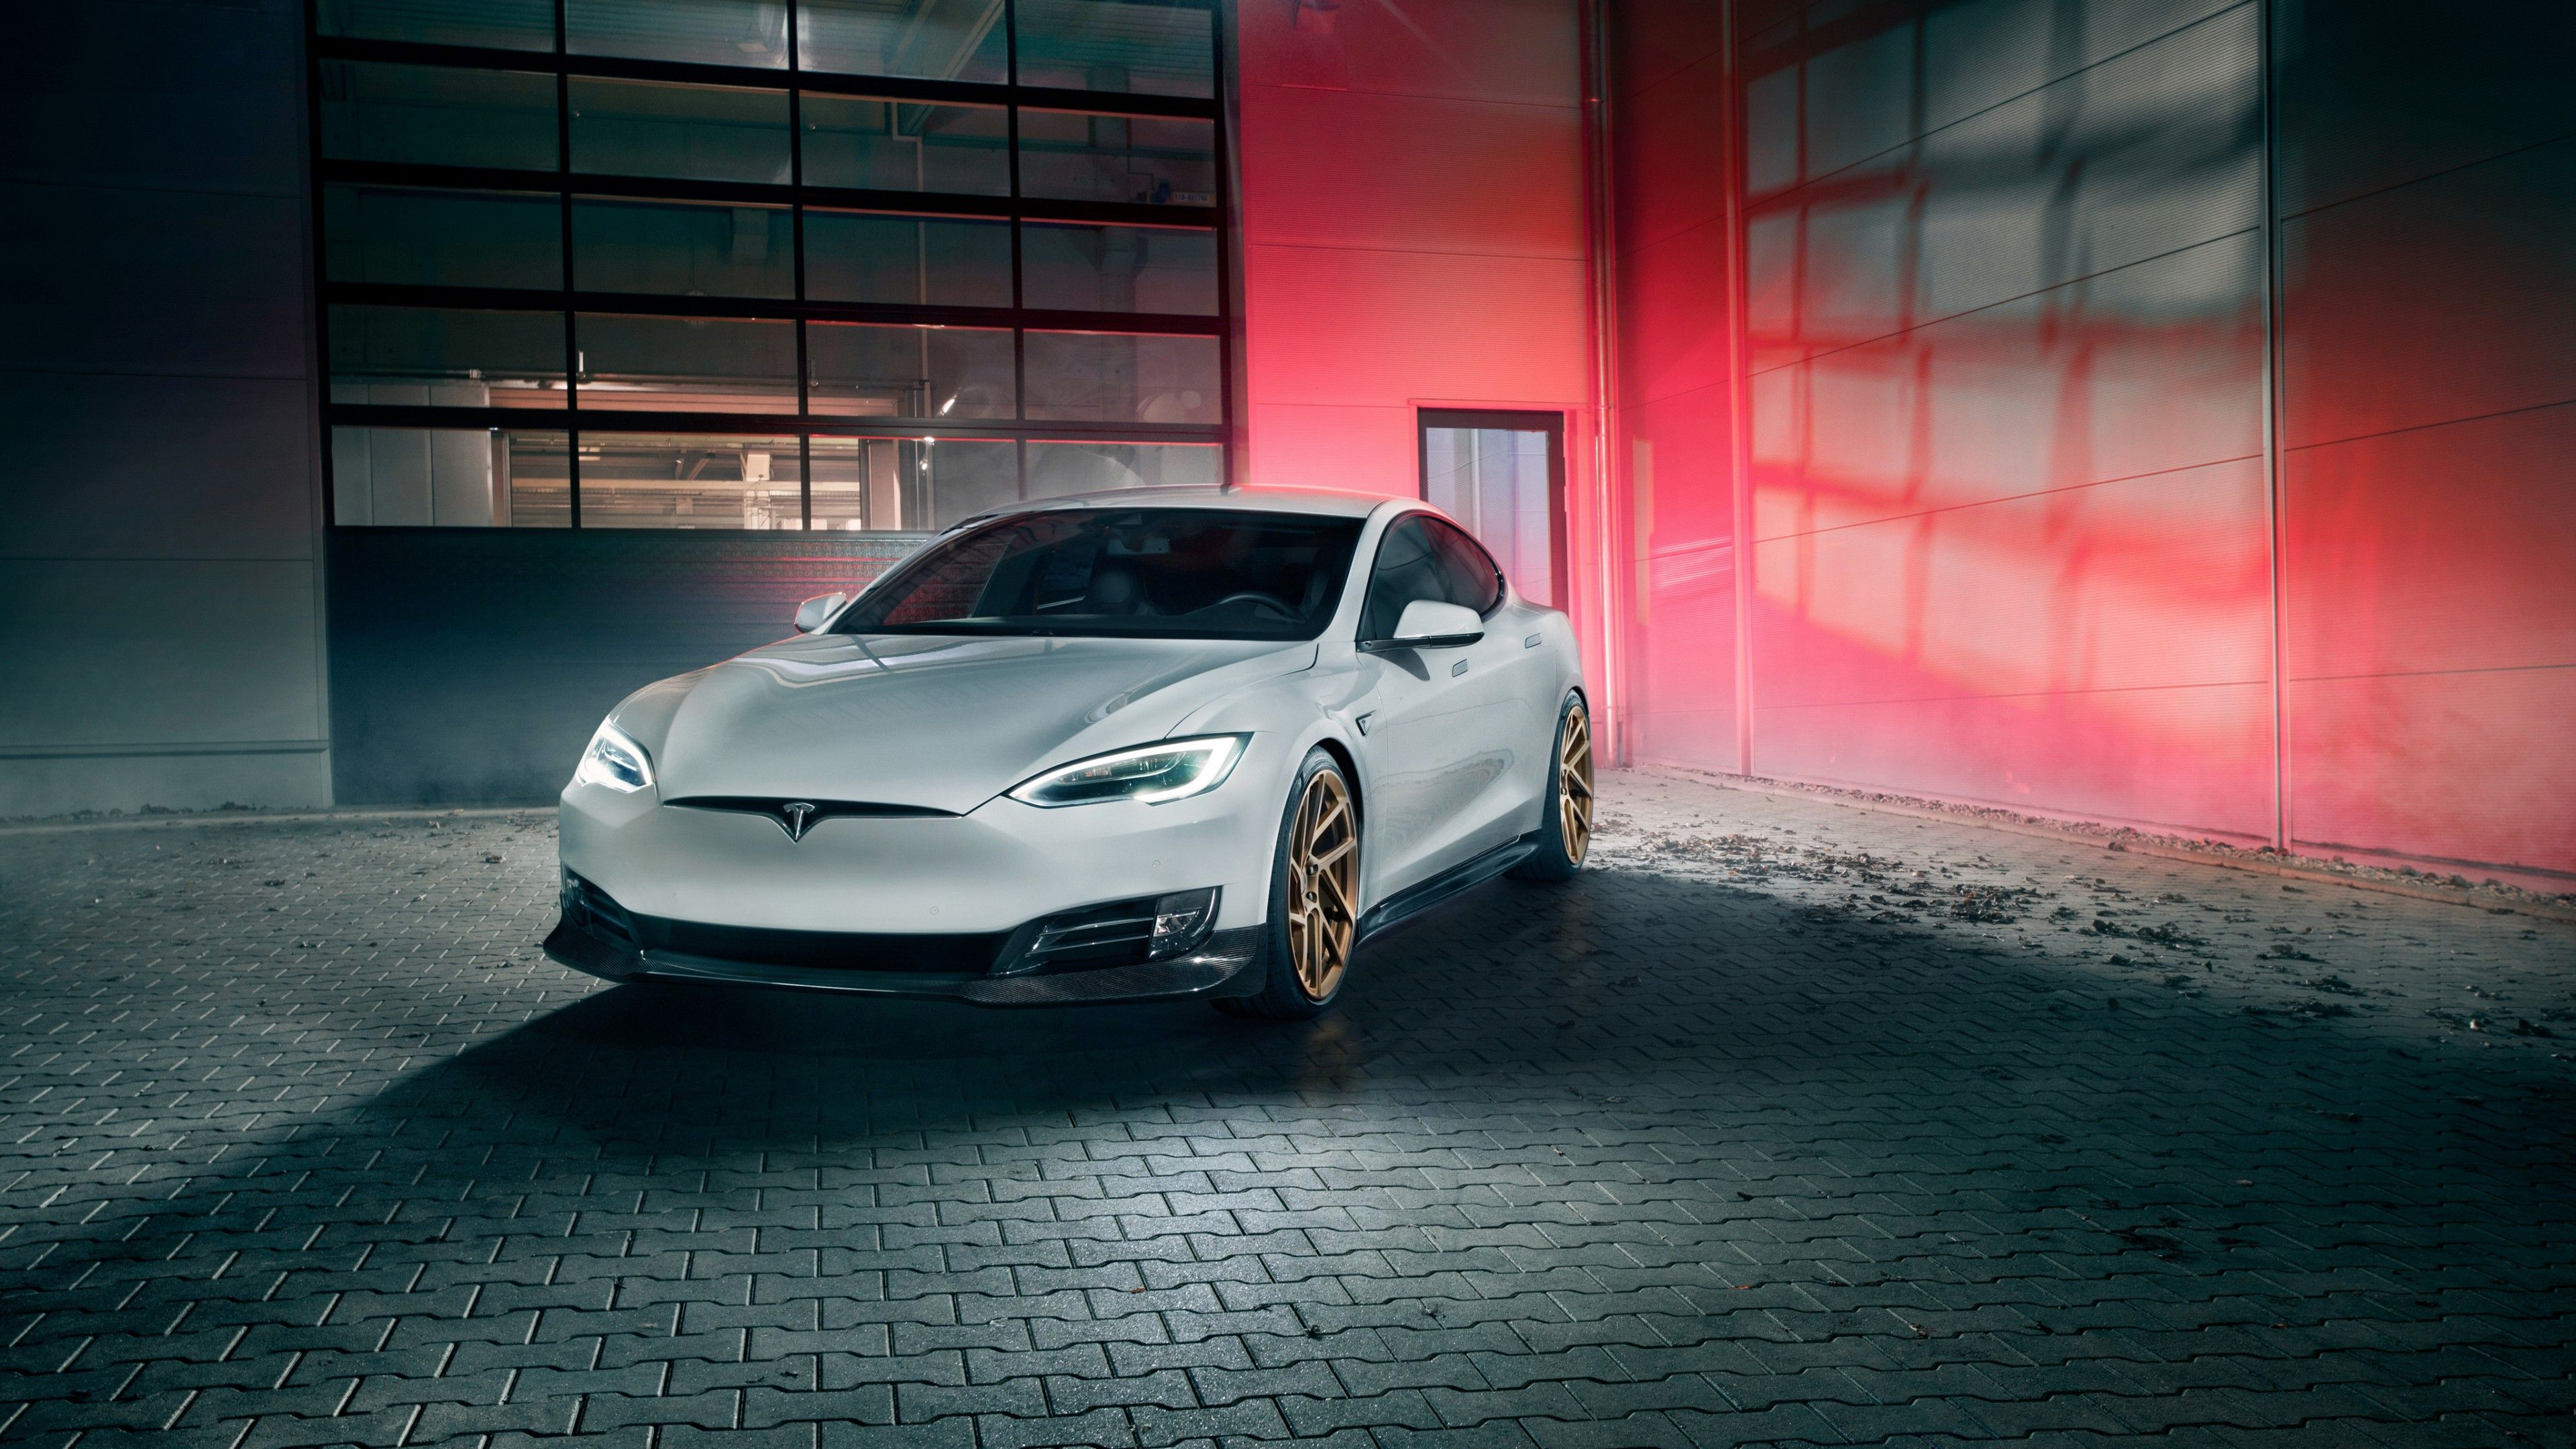

## INTRODUCTION : 
* Tesla is an American electric vehicle and clean energy company based in Palo Alto, California, United States.

* Tesla designs and manufactures electric cars, battery energy storage from home to grid-scale, solar panels and solar roof tiles, and related products and services.

* In 2020, Tesla had the most sales of battery electric vehicles and plug-in electric vehicles, capturing 16% of the plug-in market (which includes plug-in hybrids) and 23% of the battery-electric (purely electric) market. 

* The Tesla Model 3 is the all-time best-selling plug-in electric car worldwide, and, in June 2021, became the first electric car to sell 1 million units globally. 

* Tesla's global vehicle sales were 499,550 units in 2020, a 35.8% increase over the previous year. 

* In October 2021, Tesla's market capitalization reached US$1 trillion, the sixth company to do so in U.S. history.

## PURPOSE : 
* Study the Trends in the Stock Price from 2010 - 2020.
* Data Visualization and Analysis
* Design a Prediction Model (LSTM)

##Importing Libraries : 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
from pandas import read_csv
from pandas.plotting import table
from keras import activations
from keras.models import Sequential
from keras.layers import Dense,LSTM,BatchNormalization
from numpy.core.fromnumeric import size
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## Let's take a look at the Dataset : 

In [2]:
df1 = pd.read_csv('TSLA.csv')
print(df1.head())

         Date       Open   High        Low      Close    Volume
0  29-06-2010  19.000000  25.00  17.540001  23.889999  18766300
1  30-06-2010  25.790001  30.42  23.299999  23.830000  17187100
2  01-07-2010  25.000000  25.92  20.270000  21.959999   8218800
3  02-07-2010  23.000000  23.10  18.709999  19.200001   5139800
4  06-07-2010  20.000000  20.00  15.830000  16.110001   6866900


In [3]:
print(df1.tail())

            Date        Open        High         Low       Close    Volume
2411  28-01-2020  568.489990  576.809998  558.080017  566.900024  11788500
2412  29-01-2020  575.690002  589.799988  567.429993  580.989990  17801500
2413  30-01-2020  632.419983  650.880005  618.000000  640.809998  29005700
2414  31-01-2020  640.000000  653.000000  632.520020  650.570007  15719300
2415  03-02-2020  673.690002  786.140015  673.520020  780.000000  47065000


## Some more information about the Dataset : 

In [4]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2416 non-null   object 
 1   Open    2416 non-null   float64
 2   High    2416 non-null   float64
 3   Low     2416 non-null   float64
 4   Close   2416 non-null   float64
 5   Volume  2416 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 113.4+ KB
None


In [5]:
print(df1.describe())

              Open         High          Low        Close        Volume
count  2416.000000  2416.000000  2416.000000  2416.000000  2.416000e+03
mean    186.271147   189.578224   182.916639   186.403651  5.572722e+06
std     118.740163   120.892329   116.857591   119.136020  4.987809e+06
min      16.139999    16.629999    14.980000    15.800000  1.185000e+05
25%      34.342498    34.897501    33.587501    34.400002  1.899275e+06
50%     213.035003   216.745002   208.870002   212.960007  4.578400e+06
75%     266.450012   270.927513   262.102501   266.774994  7.361150e+06
max     673.690002   786.140015   673.520020   780.000000  4.706500e+07


In [6]:
for i in df1.columns:
	print(i," - ", df1[i].isna().mean()*100)

Date  -  0.0
Open  -  0.0
High  -  0.0
Low  -  0.0
Close  -  0.0
Volume  -  0.0


#DESCRIPTIVE ANALYSIS : 

## Correlation Analysis : 

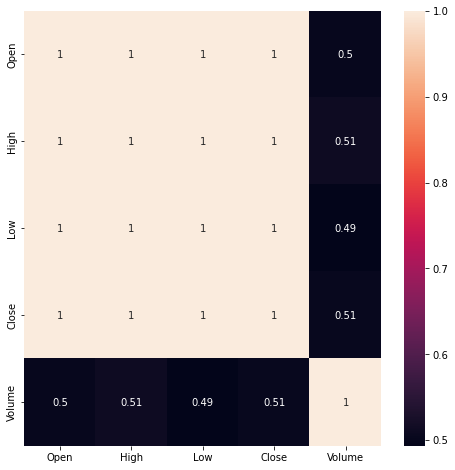

In [7]:
plt.figure(figsize=(8,8))
cormap = df1.corr()
sns.heatmap(cormap, annot = True)

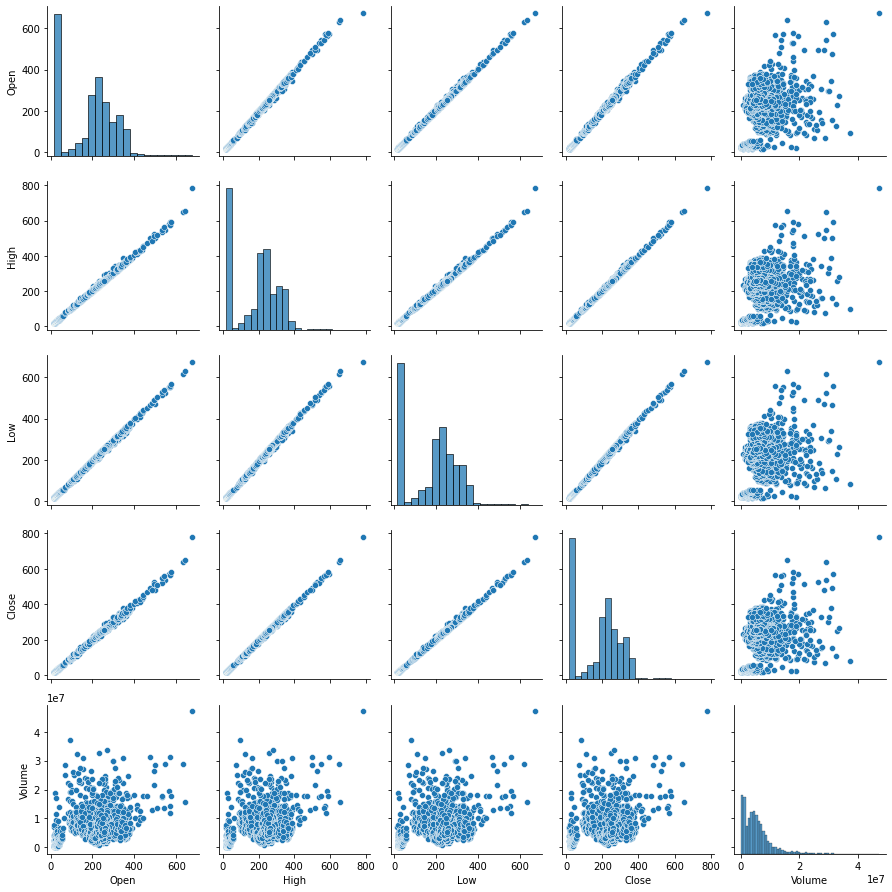

In [8]:
sns.pairplot(df1)
plt.tight_layout()

## Outlier Detection using Whisker Plots : 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

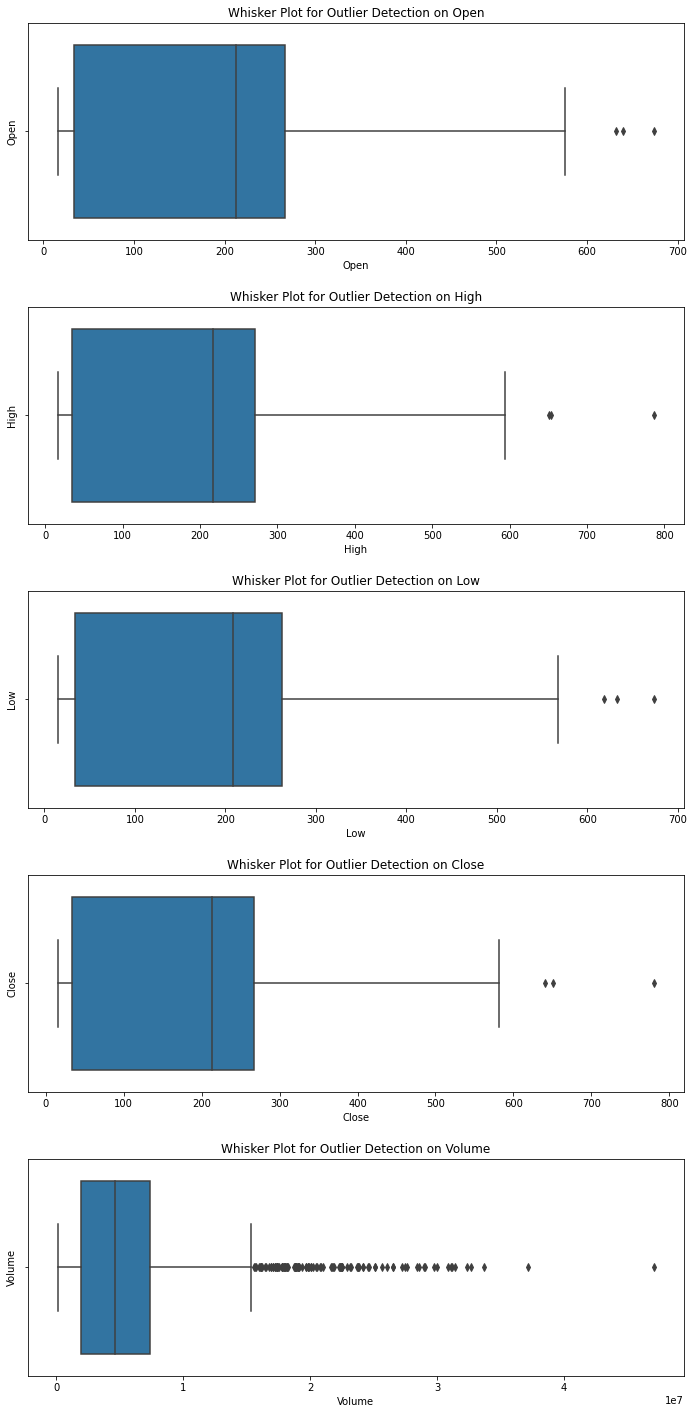

In [11]:
Column_List = ['Open', 'High', 'Low', 'Close', 'Volume']
fig, ax = plt.subplots (len(Column_List), figsize = (10, 20))

for i, col_list in enumerate(Column_List):
    sns.boxplot(df1[col_list], ax = ax[i], orient = 'h')
    ax[i].set_title("Whisker Plot for Outlier Detection on" + " " + col_list)
    ax[i].set_ylabel(col_list)
    fig.tight_layout(pad = 2)

## Trend Analysis on Historical Data : 

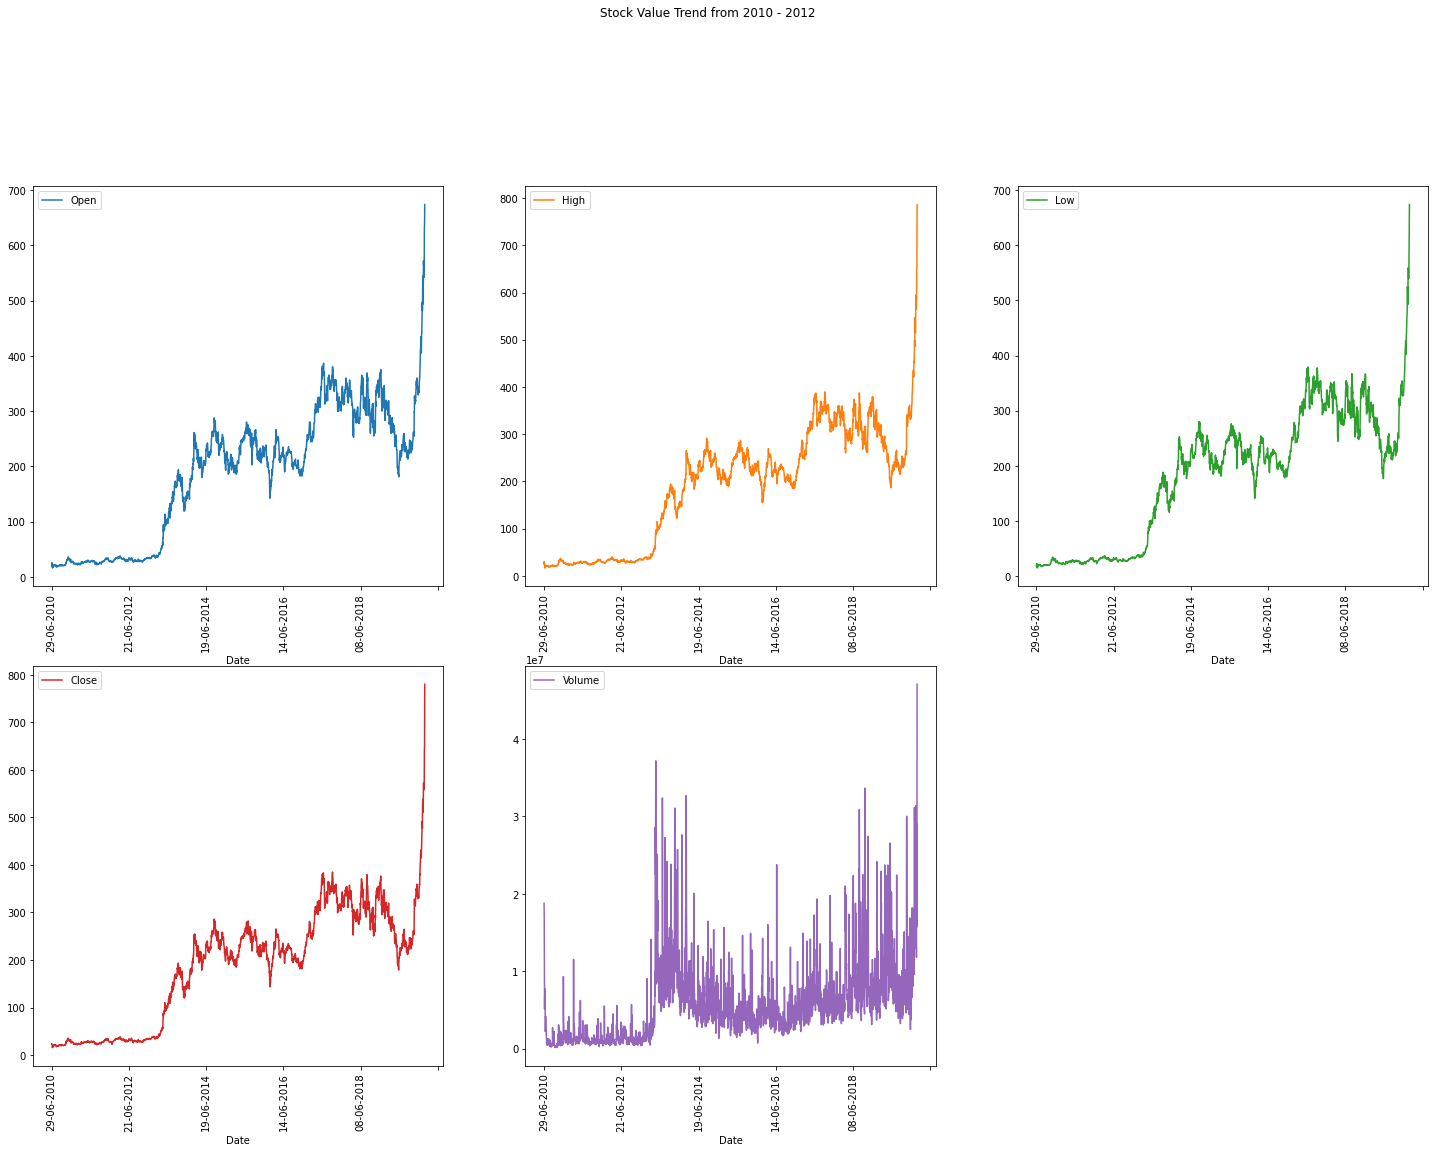

In [13]:
df1.plot(x = "Date", y = Column_List, subplots = True, layout = (3, 3), figsize = (25, 25), sharex = False, title = "Stock Value Trend from 2010 - 2012", rot = 90)
fig.tight_layout(pad = 2)

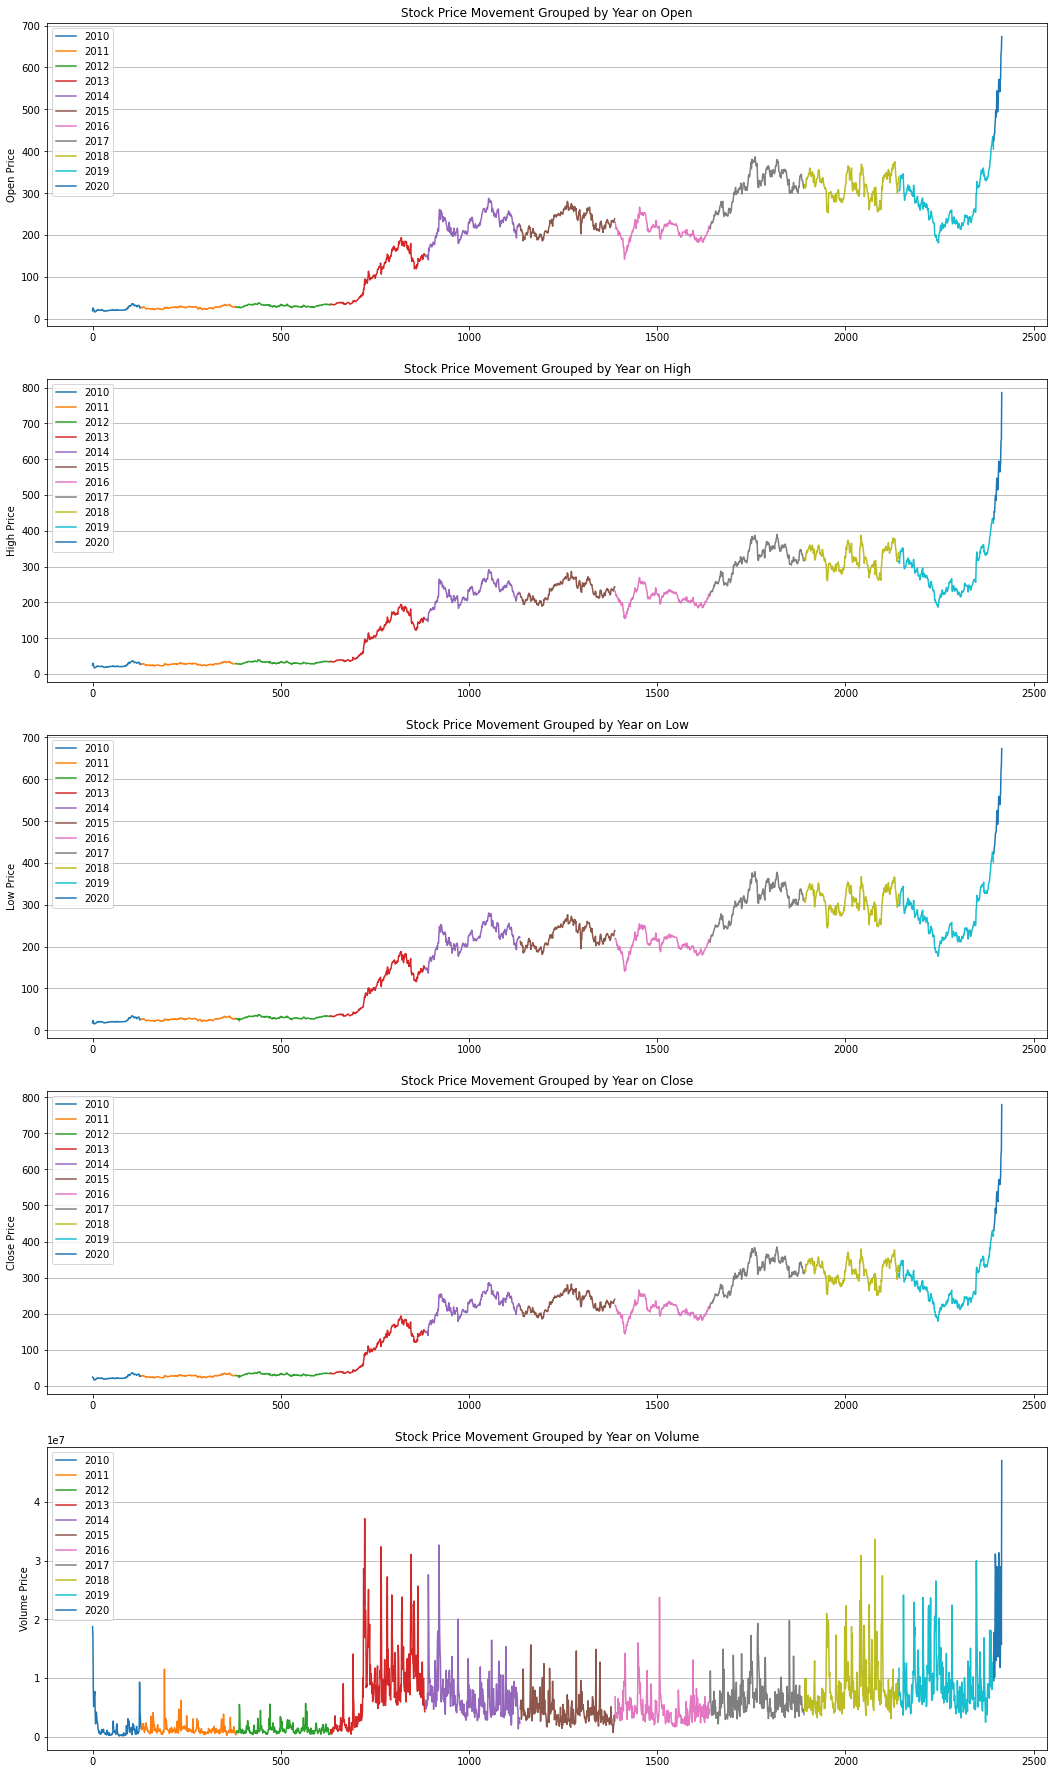

In [14]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['Year'] = df1['Date'].dt.year
df1['Month'] = df1['Date'].dt.month
df1['WeekDay'] = df1['Date'].dt.weekday

fig, ax = plt.subplots(len(Column_List), figsize = (15, 25))

for i, col_list in enumerate(Column_List):
    df1.groupby('Year')[col_list].plot(ax = ax[i], legend = True)
    ax[i].set_title("Stock Price Movement Grouped by Year on" + " " + col_list)
    ax[i].set_ylabel(col_list + " " + "Price")
    fig.tight_layout(pad = 2)
    ax[i].yaxis.grid(True)
    fig.tight_layout(pad = 2)

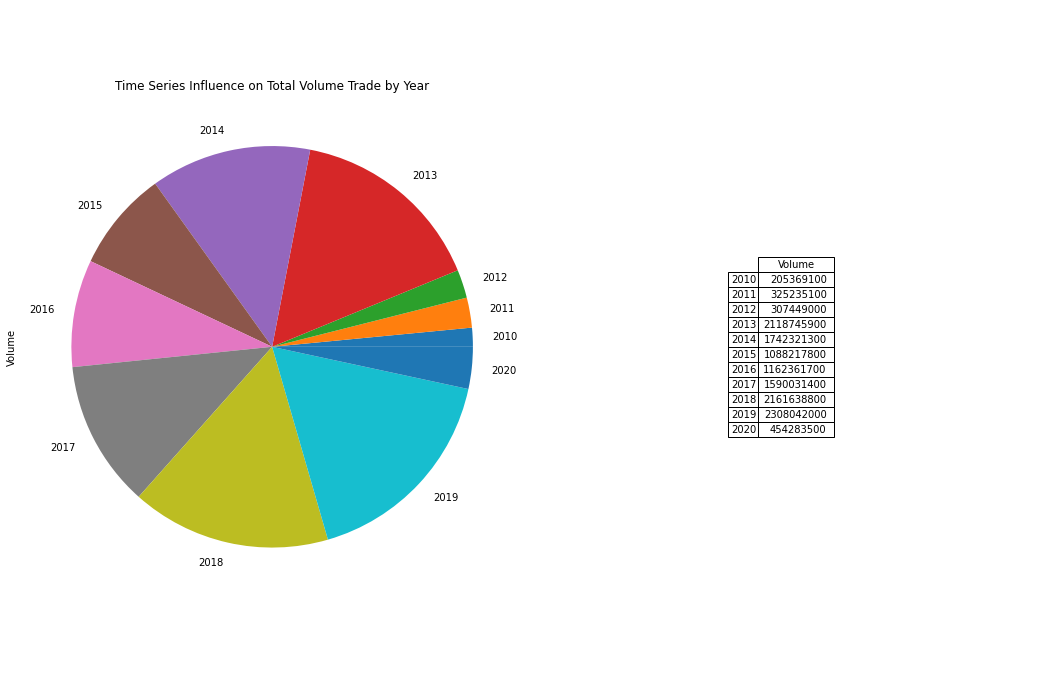

In [ ]:
for i, col_list in enumerate(Column_List):
    var = df1.groupby('Year')[col_list].sum()

var = pd.DataFrame(var)

plt.figure(figsize = (15, 10))
ax1 = plt.subplot(121)
var.plot(kind = "pie", y = "Volume", legend = False, sharex = False, title = "Time Series Influence on Total Volume Trade by Year", ax = ax1)

ax2 = plt.subplot(122)
plt.axis('tight')
plt.axis('off')
tbl = table(ax2, var, loc = 'center')
tbl.auto_set_column_width(col=list(range(len(var))))
plt.tight_layout(pad = 2)
plt.show()

# PREDICTION MODEL USING LSTM : 
* Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. 
* Unlike standard feedforward neural networks, LSTM has feedback connections.
* It can process not only single data points, but also entire sequences of data.
* LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. 
* LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs. 
* Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models and other sequence learning methods in numerous applications.

## Preprocessing : 

In [ ]:
def create_dataset(dataset, stepback=1):
	x_data, y_data = [], []
	for i in range(len(dataset)-stepback-1):
		a = dataset[i:(i+stepback), 0]
		x_data.append(a)
		y_data.append(dataset[i + stepback, 0])
	return np.array(x_data), np.array(y_data)

## Train Test Split : 

In [ ]:
np.random.seed(53)
dataframe = df1.filter(['Close'])
dataset = dataframe.values
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
stepback = 1
x_train, y_train = create_dataset(train, stepback)
x_test, y_test = create_dataset(test, stepback)
x_test2 = np.array(test[0:size(x_test)])
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

## Model : 

In [ ]:
model = Sequential()
model.add(LSTM(100, input_shape=(1, stepback),return_sequences=True))
model.add(LSTM(100, input_shape=(1, stepback)))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs=100)

Epoch 1/100
51/51 [==============================] - 4s 20ms/step - loss: 0.0146 - val_loss: 0.0225
Epoch 2/100
51/51 [==============================] - 0s 5ms/step - loss: 0.0016 - val_loss: 8.1373e-04
Epoch 3/100
51/51 [==============================] - 0s 5ms/step - loss: 4.4670e-05 - val_loss: 2.2901e-04
Epoch 4/100
51/51 [==============================] - 0s 6ms/step - loss: 3.6171e-05 - val_loss: 2.2509e-04
Epoch 5/100
51/51 [==============================] - 0s 6ms/step - loss: 3.7982e-05 - val_loss: 2.0598e-04
Epoch 6/100
51/51 [==============================] - 0s 6ms/step - loss: 3.6821e-05 - val_loss: 2.1648e-04
Epoch 7/100
51/51 [==============================] - 0s 6ms/step - loss: 3.6647e-05 - val_loss: 2.1383e-04
Epoch 8/100
51/51 [==============================] - 0s 6ms/step - loss: 3.6265e-05 - val_loss: 2.0433e-04
Epoch 9/100
51/51 [==============================] - 0s 6ms/step - loss: 3.9109e-05 - val_loss: 2.3799e-04
Epoch 10/100
51/51 [============================

## Model Evaluation : 

In [ ]:
trainpred = model.predict(x_train)
testpred = model.predict(x_test)
testpred2 = np.array(testpred)
trainpred = scaler.inverse_transform(trainpred)
y_train = scaler.inverse_transform([y_train])
testpred = scaler.inverse_transform(testpred)
y_test = scaler.inverse_transform([y_test])
trainScore = math.sqrt(mean_squared_error(y_train[0], trainpred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testpred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 4.42 RMSE
Test Score: 11.76 RMSE


In [ ]:
trainpred_plot = np.empty_like(dataset)
trainpred_plot[:, :] = np.nan
trainpred_plot[stepback:len(trainpred)+stepback, :] = trainpred
testpred_plot = np.empty_like(dataset)
testpred_plot[:, :] = np.nan
testpred_plot[len(trainpred)+(stepback*2)+1:len(dataset)-1, :] = testpred
print("Accuracy score of the predictions: {0}".format(r2_score(x_test2, testpred2)))

Accuracy score of the predictions: 0.9901678957462412


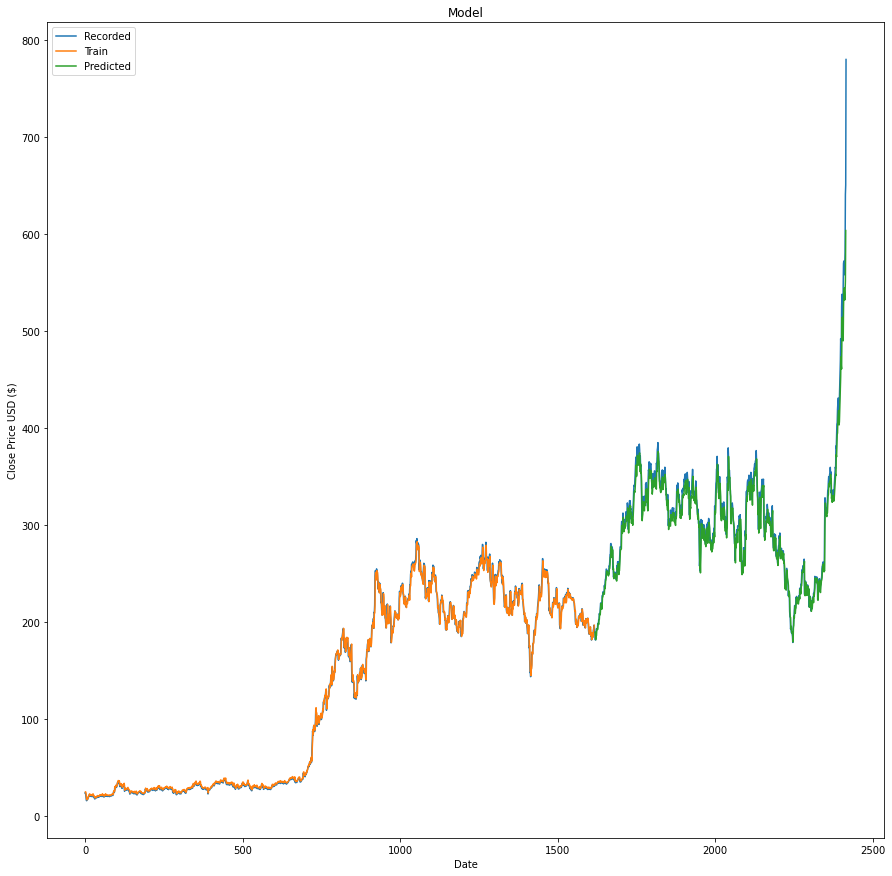

In [ ]:
plt.figure(figsize=(15,15))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainpred_plot)
plt.plot(testpred_plot)
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.legend(['Recorded','Train','Predicted'])
plt.show()

# CONCLUSION : 
* It is found that the stock volume trade spiked from 50 to around 200 from 2013 (Both Opening, Closing and Total Volumes)
* Reasons may be change in policies, change in market, change in production, change in investors, etc.
* The dataset does not provide additional reasons to analyze the cause of spike/dip.
* Since only a variant of data is available in 2020 (January to Feb 1st week), 2020 records could be considered void when comparing with grouped data (Year).
* The histogram distribution shows that the data is skewed to the left (Indication of values range between 0 - 400)
* It is very evident that Open, Close, High, Low, stock values are highly collinear and hence have a very strong relationship.
* The whisker plot indicates the presence of  very few outliers.(Almost negligible)
* Total stock volumes traded in a year over the entire historical data gives out some evident information for future improvements.
* When viewed by Year, the spike increased from 2012 through to 2020 thereby undergoing a dip in 2016.